# NetworkX で最大クラスタのサイズを調べる
- https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components
- https://qiita.com/yubais/items/89f53e33680a71301084

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm

## ランダムに N=100 個のノード間に S=20 個の辺を引き最大クラスタを見つける

In [11]:
N = 100 # number of nodes
# N = 20 # number of nodes
S = 20  # number of edges

G = nx.Graph()
G.add_nodes_from(np.arange(N))
G.add_edges_from(np.random.randint(N, size=(S,2)))

# get max connected component
max_size = 0
for component in nx.connected_components(G):
        if len(component) > max_size:
                max_cluster = component
                max_size = len(max_cluster)
print(max_cluster)

{64, 97, 96, 9, 78, 80, 18, 82, 22, 60, 93}


In [12]:
G.edges

EdgeView([(4, 89), (6, 49), (9, 18), (9, 82), (9, 60), (10, 27), (20, 94), (21, 84), (22, 60), (25, 71), (43, 55), (51, 51), (52, 61), (60, 78), (60, 97), (64, 82), (78, 93), (79, 86), (80, 96), (80, 82)])

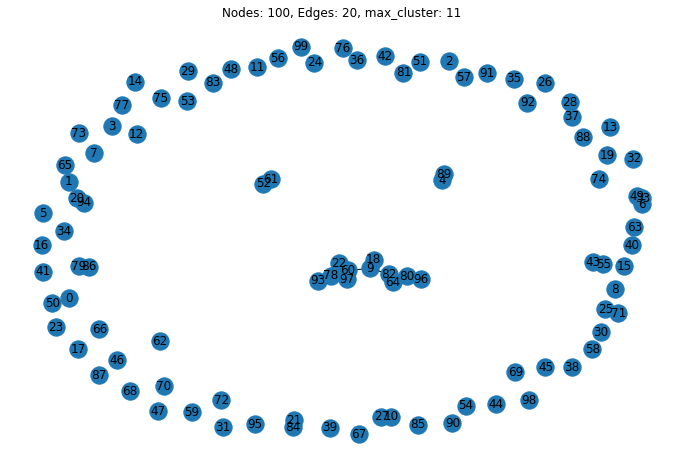

In [15]:
# draw graph
plt.figure(figsize=(12,8))
plt.title("Nodes: {}, Edges: {}, max_cluster: {}".format(N, S, max_size))
nx.draw(G, with_labels=True)
# nx.draw(G, nodelist=max_cluster, alpha=0.8, color='b', node_size=100)
plt.show()

 ## N=1,000 に増やして、S と最大クラスタの相関を調べてみる

In [16]:
N = 1000
MAX_S = N * 2
max_clusters = []
for S in tqdm(range(MAX_S + 1)):
    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    G.add_edges_from(np.random.randint(N, size=(S,2)))

    # get max connected component
    max_size = 0
    for component in nx.connected_components(G):
            if len(component) > max_size:
                    max_cluster = component
                    max_size = len(max_cluster)
    max_clusters.append(max_size)

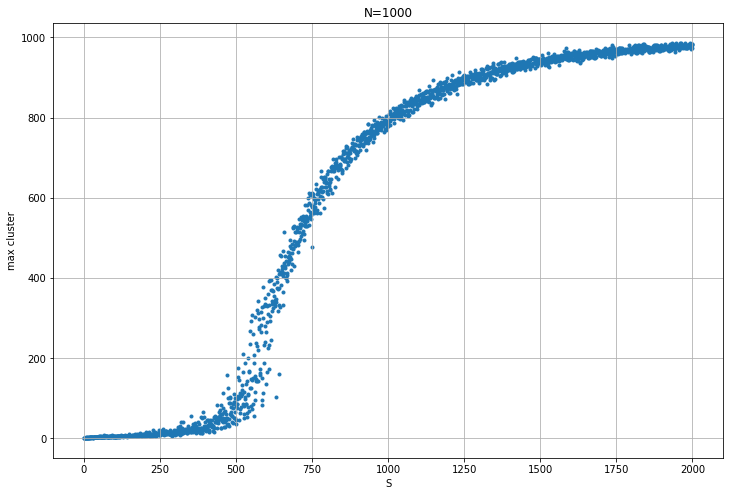

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(range(MAX_S+1), max_clusters, marker='.')
plt.title('N={}'.format(N))
plt.xlabel('S')
plt.ylabel('max cluster')
plt.grid()
plt.show()

 ## N=2,000 に増やして、S と最大クラスタの相関を調べてみる

In [19]:
N = 2000
MAX_S = N * 2
max_clusters = []
for S in tqdm(range(MAX_S + 1)):
    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    G.add_edges_from(np.random.randint(N, size=(S,2)))

    # get max connected component
    max_size = 0
    for component in nx.connected_components(G):
            if len(component) > max_size:
                    max_cluster = component
                    max_size = len(max_cluster)
    max_clusters.append(max_size)

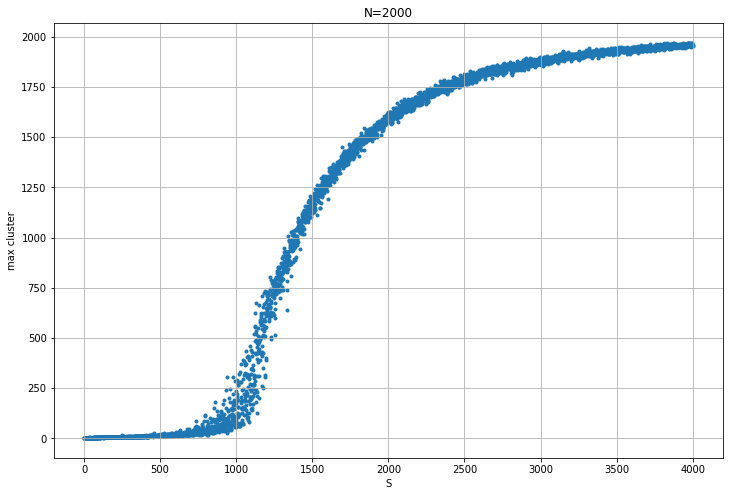

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(range(MAX_S+1), max_clusters, marker='.')
plt.title('N={}'.format(N))
plt.xlabel('S')
plt.ylabel('max cluster')
plt.grid()
plt.show()

S/N = 0.5 あたりで相転移的にクラスタが巨大化することが分かる